## Imports

In [22]:
import math   
import numpy as np 
import librosa
import matplotlib.pyplot as plt

## Helper Functions

In [23]:
#SNR in dB
#given a signal and desired SNR, this gives the required AWGN what should be added to the signal to get the desired SNR
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

#given a signal, noise (audio) and desired SNR, this gives the noise (scaled version of noise input) that gives the desired SNR
def get_noise_from_sound(signal,noise,SNR):
    RMS_s=math.sqrt(np.mean(signal**2))
    #required RMS of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    
    #current RMS of noise
    RMS_n_current=math.sqrt(np.mean(noise**2))
    noise=noise*(RMS_n/RMS_n_current)
    
    return noise

#convert complex np array to polar arrays (2 apprays; abs and angle)
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)

## Plotting

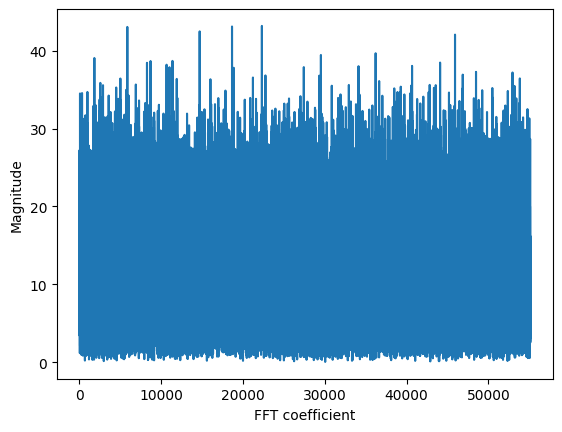

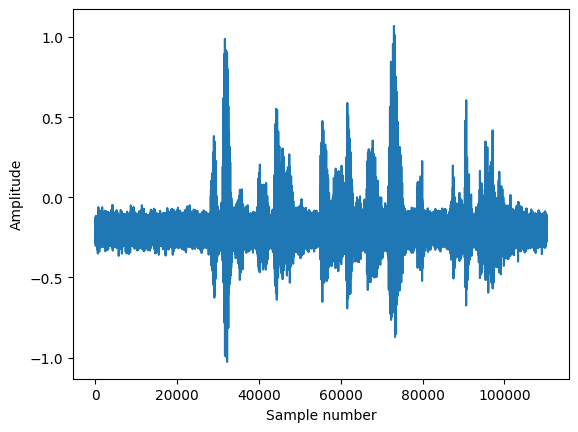

In [24]:
# signal_file= r'C:\Users\rjsha\Downloads\audio_processing-master\data\signal.wav'
from scipy.io.wavfile import write
signal_file = r'/home/mangdy/Desktop/trimmed_clean/1.wav'
signal, sr = librosa.load(signal_file)
signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
noise=get_white_noise(signal,SNR=15)
write(r"/home/mangdy/Desktop/gauss_noise/noise.wav",sr,noise)
#analyze the frequency components in the signal
X=np.fft.rfft(noise)
radius,angle=to_polar(X)
plt.plot(radius)
plt.xlabel("FFT coefficient")
plt.ylabel("Magnitude")
plt.show()
signal_noise=signal+noise
plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

## Additive Model of Noisy Speech

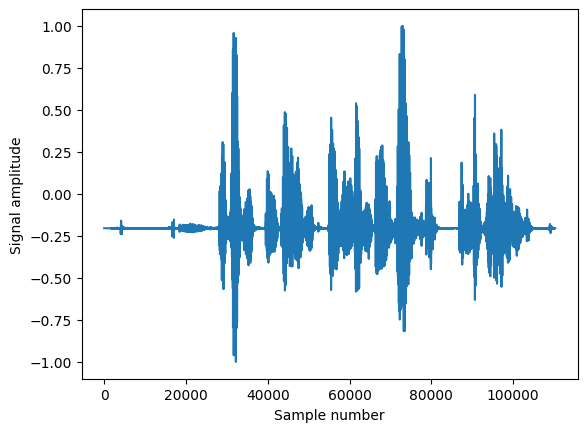

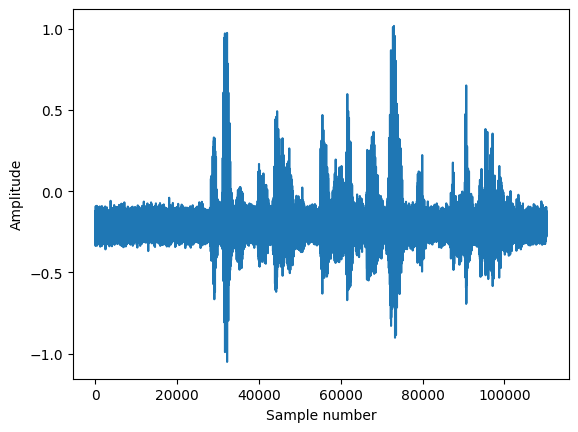

In [28]:
#**********************************
#*************add real world noise******
#**********************************

from scipy.io.wavfile import write

for i in range(310):
#     signal_file= r'C:\Users\rjsha\Downloads\audio_processing-master\data\signal.wav'
    signal_file = r'/home/mangdy/Desktop/trimmed_clean/' + str(i+1) + '.wav'
    signal, sr = librosa.load(signal_file)
    signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
    

    noise_file=r"/home/mangdy/Desktop/gauss_noise/1.wav"
    noise, sr = librosa.load(noise_file)
#     print(sr)
    noise=np.interp(noise, (noise.min(), noise.max()), (-1, 1))


    #crop noise if its longer than signal
    if(len(noise)>len(signal)):
        noise=noise[0:len(signal)]

    noise=get_noise_from_sound(signal,noise,SNR=15)

    signal_noise=signal+noise

    if i == 0:
        plt.plot(signal)
        plt.xlabel("Sample number")
        plt.ylabel("Signal amplitude")
        plt.show()
#         print("SNR = " + str(20*np.log10(math.sqrt(np.mean(signal**2))/math.sqrt(np.mean(noise**2)))))

        plt.plot(signal_noise)
        plt.xlabel("Sample number")
        plt.ylabel("Amplitude")
        plt.show()
    
    
    write(r"/home/mangdy/Desktop/trimmed_noisy/"+str(i+1)+".wav",sr,signal_noise)


## Non-Additive Model of Noisy Speech

In [13]:
import librosa
import numpy as np
from scipy.io.wavfile import write

for i in range(310):

    # Load clean speech and noise signals
    clean, sr = librosa.load('/home/mangdy/Desktop/trimmed_clean/'+ str(i+1) + '.wav', sr=None)
    noise, _ = librosa.load('/home/mangdy/Desktop/gauss_noise/1.wav', sr=sr, duration=len(clean)/sr)

    # Compute STFTs of clean speech and noise
    clean_stft = librosa.stft(clean, n_fft=2048, hop_length=512)
    noise_stft = librosa.stft(noise, n_fft=2048, hop_length=512)

    # Compute ratio of clean speech to noise in the frequency domain
    ratio = np.abs(clean_stft) / np.abs(noise_stft)

    # Set desired noise-to-signal ratio (NSR)
    nsr = 5

    # Compute desired noise STFT
    desired_noise_stft = ratio * nsr * noise_stft
    
    # Combine phase of clean speech STFT with desired noise STFT magnitude
    noisy_stft = np.multiply(desired_noise_stft, np.exp(1j * np.angle(clean_stft)))

    # Compute inverse STFT to get noisy speech signal
    noisy = librosa.istft(noisy_stft, hop_length=512)
    
    # Save noisy speech signal to file
    write(r"/home/mangdy/Desktop/olt/trimmed_noisy/"+str(i+1)+".wav",sr,noisy)
    